In [ ]:
"""
Survival Analysis for Part 1 of SA Project. 
This project is focused on the survival analysis of pumps during a hurricane.
The rest of the projects had to be done in SAS due to easier way to create the needed dataset.

@author: Thomas Gow
"""

In [1]:
# Libraries
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib as plt
from lifelines.statistics import multivariate_logrank_test

In [2]:
# Loading data
data = pd.read_sas(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/hurricane.sas7bdat")

In [3]:
# Creating neccessary formatted data
# Event 1 or 0
event = data['survive']

# How long the pump lasted
duration = data['hour']
fail=1-event

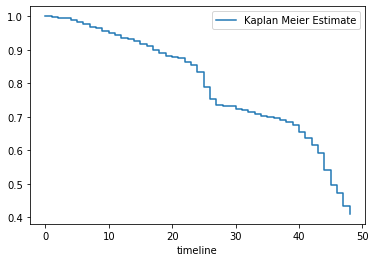

In [5]:
#%% create a kmf object
kmf = KaplanMeierFitter()

# Fit the data into the model
kmf.fit(duration, fail, label='Kaplan Meier Estimate')

# Create an estimate
kmf.plot(ci_show=False)

In [6]:
# Output survival function
sf = pd.DataFrame(kmf.survival_function_)

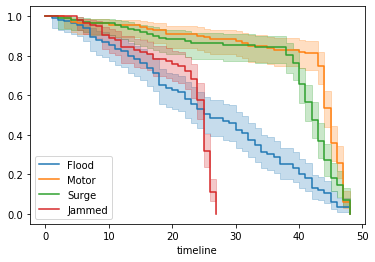

In [8]:
# Initiate the class to create an object
kmf1 = KaplanMeierFitter()

# Four Cohorts are compared.
groups = data['reason']
i1 = (groups == 1)
i2 = (groups == 2)
i3 = (groups == 3)
i4 = (groups == 4)

# Fit the model for 1st cohort
kmf1.fit(duration[i1], fail[i1], label='Flood')
a1 = kmf1.plot()

# Fit the model for 2nd cohort
kmf1.fit(duration[i2], fail[i2], label='Motor')
a2 = kmf1.plot(ax=a1)

# Fit the model for 3rd cohort
kmf1.fit(duration[i3], fail[i3], label='Surge')
a3 = kmf1.plot(ax=a2)

# Fit the model for 4th cohort
kmf1.fit(duration[i4], fail[i4], label='Jammed')
a4 = kmf1.plot(ax=a3)

# Although it looks as though motor and flood should be grouped together(read project description if out of context).
# It is my opinion Flood and Surge should still be paired together based off of similar types of failure even though
# Motor and Surge have the most similar survival timelines.

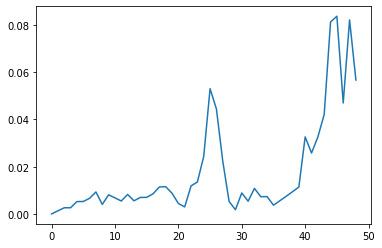

In [16]:
# Creating formatted conditional probability data
df = pd.DataFrame(kmf.event_table)
df['condprob'] = df['observed'] / df['at_risk']
df['event'] = df.index

import matplotlib.pyplot as plt 
# Plot conditional probability
plt.plot(df['event'], df['condprob'])

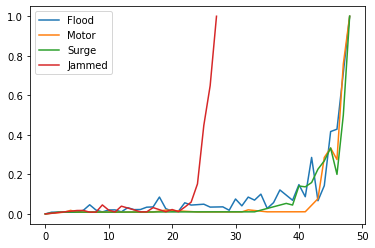

In [17]:
# Flood event tables
# Flood event table(1)
kmf1.fit(duration[i1], fail[i1], label='Flood')
df1 = kmf1.event_table
df1['condprob'] = df1['observed'] / df1['at_risk']
df1['event'] = df1.index
plt.plot(df1['event'], df1['condprob'], label='Flood')

# Motor event table(2)
kmf1.fit(duration[i2], fail[i2], label='Motor')
df2 = kmf1.event_table
df2['condprob'] = df2['observed'] / df2['at_risk']
df2['event'] = df2.index
plt.plot(df2['event'], df2['condprob'], label='Motor')

# Surge event table(3)
kmf1.fit(duration[i3], fail[i3], label='Surge')
df3 = kmf1.event_table
df3['condprob'] = df3['observed'] / df3['at_risk']
df3['event'] = df3.index
plt.plot(df3['event'], df3['condprob'], label='Surge')

# Jammed event table(4)
kmf1.fit(duration[i4], fail[i4], label='Jammed')
df4 = kmf1.event_table
df4['condprob'] = df4['observed'] / df4['at_risk']
df4['event'] = df4.index
plt.plot(df4['event'], df4['condprob'], label='Jammed')

# Plotting legend and show
plt.legend()
plt.show()

In [18]:
# Looks like flood, motor and surge are similar and jammed is different
# Jammed is the outlier compared to the other types of pump failure

# Multivariate logrank test summary
results = multivariate_logrank_test(duration, groups, fail)
results.print_summary()


<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4

---
 test_statistic      p  -log2(p)
        1119.55 <0.005    798.46


In [21]:
# Seeing how it'd be if motor and surge were paired together
motor_surge = data[(data.reason == 2) | (data.reason == 3)]
event_observed_ms = motor_surge['survive']
fail_ms = 1-event_observed_ms
duration_ms = motor_surge['hour']
groups_ms = motor_surge['reason']

In [22]:
# Multivariate logrank test summary. (motor and surge grouped)
results_ms = multivariate_logrank_test(duration_ms, groups_ms, fail_ms)
results_ms.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
          12.16 <0.005     11.00


In [ ]:
# df.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/cond_prob_fail.csv")
# sf.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/survival_function.csv")
# sf1.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/survival_function_flood.csv")
# sf2.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/survival_function_motor.csv")
# sf3.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/survival_function_surge.csv")
# sf4.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/survival_function_jammed.csv")
# df1.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/cond_prob_fail_flood.csv")
# df2.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/cond_prob_fail_motor.csv")
# df3.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/cond_prob_fail_surge.csv")
# df4.to_csv(r"/Users/thomasgow/Documents/IAA/Survival Analysis/SA Data/cond_prob_fail_jammed.csv")